https://www.10xgenomics.com/datasets/gene-and-protein-expression-library-of-human-breast-cancer-cytassist-ffpe-2-standard

In [ ]:
!curl -O https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_filtered_feature_bc_matrix.h5


In [ ]:
!curl -O https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_spatial.tar.gz


In [ ]:
!curl -O https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_raw_probe_bc_matrix.h5


In [ ]:
!curl -O https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_isotype_normalization_factors.csv

In [ ]:
# Sanity Check
!file CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_filtered_feature_bc_matrix.h5

In [14]:
import tarfile
import os

# Define paths
tar_path = "CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_spatial.tar.gz"
extract_dir = "./"  # You can choose another directory if you like

# Create extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Open and extract the tar.gz file
with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=extract_dir)

print(f"Spatial data extracted to: {extract_dir}")
print("Extracted files:", os.listdir(extract_dir))


Spatial data extracted to: ./
Extracted files: ['VisiumRNABC_v2.h5ad', 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_isotype_normalization_factors.csv', 'VisiumProteinBC_v2.h5ad', '.DS_Store', 'VisiumProteinBC_v3.h5ad', 'cache', 'SCP1039', 'VisiumRNABC_v3.h5ad', 'VisiumRNABC.h5ad', 'VisiumProteinBC.h5ad', '.ipynb_checkpoints', 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_spatial.tar.gz', 'spatial', 'Mongoose_SpatialData.ipynb', 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_filtered_feature_bc_matrix.h5', 'Explore_cell_x_gene_atlases.ipynb', 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_raw_probe_bc_matrix.h5']


In [15]:
# Import the necessary modules
from spatialdata_io.readers.visium import visium as visium_reader
import spatialdata.models.models as models

# Save the original parse function
original_parse = models.Image2DModel.parse

# Define a patched version that removes the unexpected keyword argument 'rgb'
def patched_parse(*args, **kwargs):
    # Remove 'rgb' if present to avoid the TypeError
    kwargs.pop("rgb", None)
    return original_parse(*args, **kwargs)

# Apply the monkey-patch
models.Image2DModel.parse = patched_parse

# Now call the visium reader as usual
base_path = "./"
counts_file_name = "CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_filtered_feature_bc_matrix.h5"

sdata_visium = visium_reader(
    path=base_path,
    counts_file=counts_file_name,
    dataset_id="CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer"
)

print("Visium dataset loaded successfully!")


INFO     reading CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_filtered_feature_bc_matrix.h5               


/opt/homebrew/Caskroom/mambaforge/base/envs/spatial_mamba/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/Caskroom/mambaforge/base/envs/spatial_mamba/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/Caskroom/mambaforge/base/envs/spatial_mamba/lib/python3.9/site-packages/spatialdata/models/models.py:1035: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


Visium dataset loaded successfully!


In [16]:
sdata_visium

SpatialData object
├── Images
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_hires_image': DataArray[cyx] (3, 1957, 2000)
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_lowres_image': DataArray[cyx] (3, 587, 600)
├── Shapes
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer': GeoDataFrame shape: (4169, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (4169, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_lowres_image (Images), CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer (Shapes)
    ▸ 'global', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer (Shapes)

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3492063].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3492063].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3492063].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3492063].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3492063].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3492063].


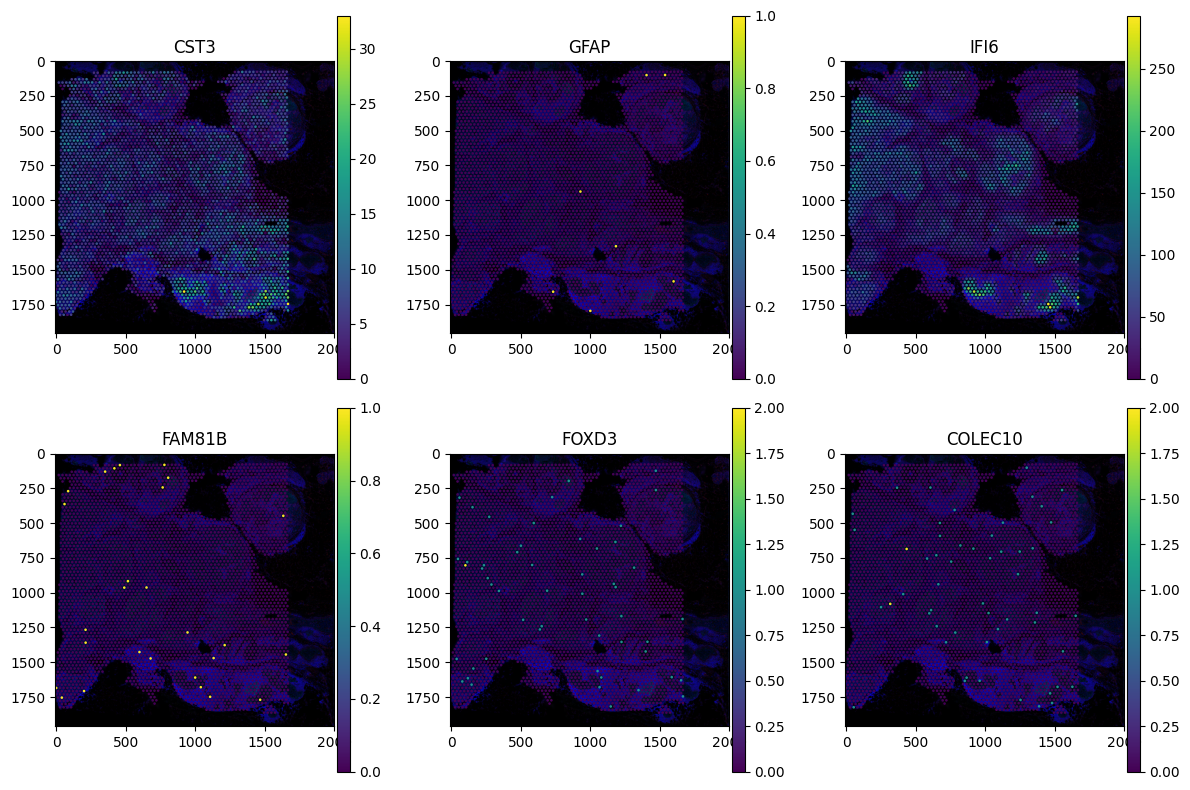

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for idx, gene in enumerate(["CST3", "GFAP", "IFI6", "FAM81B", "FOXD3", "COLEC10"]):
    (
        sdata_visium.pl.render_images()
        .pl.render_shapes(color=f"{gene}")
        .pl.show("downscaled_hires", ax=axs[idx // 3, idx % 3], title=gene)
    )

fig.tight_layout()

In [30]:
import numpy as np
import scanpy as sc
import json
import os

# 1. Get the AnnData object (the table)
adata = sdata_visium["table"]
sample_key = "CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer"

# 2. Retrieve images using their full keys and transpose them.
hires_key = f"{sample_key}_hires_image"
lowres_key = f"{sample_key}_lowres_image"

# Retrieve image arrays
hires_img = np.array(sdata_visium.get(hires_key))
lowres_img = np.array(sdata_visium.get(lowres_key))

# Transpose from (channels, height, width) to (height, width, channels)
hires_img = np.transpose(hires_img, (1, 2, 0))
lowres_img = np.transpose(lowres_img, (1, 2, 0))

# 3. Attach the images to adata.uns under the 'spatial' key.
adata.uns["spatial"] = {sample_key: {}}
adata.uns["spatial"][sample_key]["images"] = {"hires": hires_img, "lowres": lowres_img}

# 4. Retrieve spatial coordinates from the Shapes element.
# Based on your printed tree, spatial coordinates for the sample are stored under the key matching sample_key.
coords_df = sdata_visium.get(sample_key)  # This should be a GeoDataFrame with 2 columns (e.g., 'x' and 'y')
print("Retrieved spatial coordinates. Columns:", coords_df.columns)

# Determine coordinate columns; adjust names as necessary.
if set(["x", "y"]).issubset(coords_df.columns):
    coords = coords_df[["x", "y"]].to_numpy()
elif set(["X", "Y"]).issubset(coords_df.columns):
    coords = coords_df[["X", "Y"]].to_numpy()
elif "geometry" in coords_df.columns:
    coords = np.vstack(coords_df["geometry"].centroid.apply(lambda geom: (geom.x, geom.y)))
else:
    raise ValueError("Could not find expected spatial coordinate columns. Found: " + ", ".join(coords_df.columns))

# Attach the coordinates to adata.obsm under the key "spatial"
adata.obsm["spatial"] = coords

# 5. Attach scale factors.
scalefactors_file = "spatial/scalefactors_json.json"
if os.path.exists(scalefactors_file):
    with open(scalefactors_file) as f:
        scalefactors = json.load(f)
    print("Loaded scale factors from JSON:", scalefactors)
else:
    print("Scale factors file not found, using dummy scale factors.")
    scalefactors = {"tissue_hires_scalef": 1.0, "tissue_lowres_scalef": 1.0}

adata.uns["spatial"][sample_key]["scalefactors"] = scalefactors



Retrieved spatial coordinates. Columns: Index(['geometry', 'radius'], dtype='object')
Loaded scale factors from JSON: {'regist_target_img_scalef': 0.25943702, 'tissue_hires_scalef': 0.08647901, 'tissue_lowres_scalef': 0.025943702, 'fiducial_diameter_fullres': 323.7419448316662, 'spot_diameter_fullres': 215.82796322111085}


In [13]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import scanpy as sc
adata_protein = sc.read_10x_h5("CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_raw_probe_bc_matrix.h5")
print(adata_protein)

AnnData object with n_obs × n_vars = 4992 × 54580
    obs: 'filtered_barcodes'
    var: 'gene_ids', 'probe_ids', 'feature_types', 'filtered_probes', 'gene_name', 'genome', 'probe_region'


In [63]:
adata_protein.var['probe_ids']

CYP51A1|5c60a99       DEPRECATED_ENSG00000001630|CYP51A1|5c60a99
YBX2|6bb010c             DEPRECATED_ENSG00000006047|YBX2|6bb010c
YBX2|db3fdd6             DEPRECATED_ENSG00000006047|YBX2|db3fdd6
ALDH3B1|c41b7d0       DEPRECATED_ENSG00000006534|ALDH3B1|c41b7d0
DBF4|8e5434c             DEPRECATED_ENSG00000006634|DBF4|8e5434c
                                         ...                    
AL603764.2|f32fe8d            ENSG00000286135|AL603764.2|f32fe8d
DERPC|7fd14c6                      ENSG00000286140|DERPC|7fd14c6
AC023490.5|5d2a909            ENSG00000286175|AC023490.5|5d2a909
NOTCH2NLC|ef88c77              ENSG00000286219|NOTCH2NLC|ef88c77
AC007244.1|2b89ff8            ENSG00000286265|AC007244.1|2b89ff8
Name: probe_ids, Length: 54580, dtype: object

In [15]:
adata_protein.raw = adata_protein.copy()   # saves everything into .raw

In [16]:
# Store the raw data in a layer called "raw_layer"
adata_protein.layers["raw_layer"] = adata_protein.raw.X.copy()

In [17]:
adata_protein

AnnData object with n_obs × n_vars = 4992 × 54580
    obs: 'filtered_barcodes'
    var: 'gene_ids', 'probe_ids', 'feature_types', 'filtered_probes', 'gene_name', 'genome', 'probe_region'
    layers: 'raw_layer'

In [18]:
import pandas as pd
iso_factors = pd.read_csv("CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_isotype_normalization_factors.csv", index_col=0)

In [12]:
adata_protein.obs

filtered_barcodes
AACACCTACTATCGAA-1              False
AACACGTGCATCGCAC-1              False
AACACTTGGCAAGGAA-1               True
AACAGGAAGAGCATAG-1              False
AACAGGATTCATAGTT-1               True
...                               ...
TGTTGGAACGAGGTCA-1               True
TGTTGGAAGCTCGGTA-1               True
TGTTGGATGGACTTCT-1               True
TGTTGGCCAGACCTAC-1               True
TGTTGGCCTACACGTG-1               True

[4992 rows x 1 columns]

In [13]:
adata_protein.var

gene_ids  \
CYP51A1|5c60a99     DEPRECATED_ENSG00000001630   
YBX2|6bb010c        DEPRECATED_ENSG00000006047   
YBX2|db3fdd6        DEPRECATED_ENSG00000006047   
ALDH3B1|c41b7d0     DEPRECATED_ENSG00000006534   
DBF4|8e5434c        DEPRECATED_ENSG00000006634   
...                                        ...   
AL603764.2|f32fe8d             ENSG00000286135   
DERPC|7fd14c6                  ENSG00000286140   
AC023490.5|5d2a909             ENSG00000286175   
NOTCH2NLC|ef88c77              ENSG00000286219   
AC007244.1|2b89ff8             ENSG00000286265   

                                                     probe_ids  \
CYP51A1|5c60a99     DEPRECATED_ENSG00000001630|CYP51A1|5c60a99   
YBX2|6bb010c           DEPRECATED_ENSG00000006047|YBX2|6bb010c   
YBX2|db3fdd6           DEPRECATED_ENSG00000006047|YBX2|db3fdd6   
ALDH3B1|c41b7d0     DEPRECATED_ENSG00000006534|ALDH3B1|c41b7d0   
DBF4|8e5434c           DEPRECATED_ENSG00000006634|DBF4|8e5434c   
...                                                        ...   
AL603764.2|f32fe8d          ENSG00000286135|AL603764.2|f32fe8d   
DERPC|7fd14c6                    ENSG00000286140|DERPC|7fd14c6   
AC023490.5|5d2a909          ENSG00000286175|AC023490.5|5d2a909   
NOTCH2NLC|ef88c77            ENSG00000286219|NOTCH2NLC|ef88c77   
AC007244.1|2b89ff8          ENSG00000286265|AC007244.1|2b89ff8   

                      feature_types  filtered_probes  \
CYP51A1|5c60a99     Gene Expression            False   
YBX2|6bb010c        Gene Expression            False   
YBX2|db3fdd6        Gene Expression            False   
ALDH3B1|c41b7d0     Gene Expression            False   
DBF4|8e5434c        Gene Expression            False   
...                             ...              ...   
AL603764.2|f32fe8d  Gene Expression             True   
DERPC|7fd14c6       Gene Expression             True   
AC023490.5|5d2a909  Gene Expression            False   
NOTCH2NLC|ef88c77   Gene Expression            False   
AC007244.1|2b89ff8  Gene Expression            False   

                                     gene_name  genome probe_region  
CYP51A1|5c60a99     DEPRECATED_ENSG00000001630  GRCh38    unspliced  
YBX2|6bb010c        DEPRECATED_ENSG00000006047  GRCh38    unspliced  
YBX2|db3fdd6        DEPRECATED_ENSG00000006047  GRCh38    unspliced  
ALDH3B1|c41b7d0     DEPRECATED_ENSG00000006534  GRCh38    unspliced  
DBF4|8e5434c        DEPRECATED_ENSG00000006634  GRCh38    unspliced  
...                                        ...     ...          ...  
AL603764.2|f32fe8d                  AL603764.2  GRCh38      spliced  
DERPC|7fd14c6                            DERPC  GRCh38      spliced  
AC023490.5|5d2a909                  AC023490.5  GRCh38    unspliced  
NOTCH2NLC|ef88c77                    NOTCH2NLC  GRCh38    unspliced  
AC007244.1|2b89ff8                  AC007244.1  GRCh38    unspliced  

[54580 rows x 7 columns]

In [19]:
# Show the column headers
print(iso_factors.columns)

# Peek at the first few rows
iso_factors.head()

Index(['in_tissue', 'normalization_factor'], dtype='object')


in_tissue  normalization_factor
barcode                                            
AACACCTACTATCGAA-1          0             30.211480
AACACGTGCATCGCAC-1          0             76.335878
AACACTTGGCAAGGAA-1          1             51.282051
AACAGGAAGAGCATAG-1          0             63.291139
AACAGGATTCATAGTT-1          1             67.114094

In [20]:
# Ensure your AnnData’s obs index matches the CSV index
assert all(adata_protein.obs_names.isin(iso_factors.index)), "Some barcodes missing in normalization file"

# Pull out the spot‑level factors in the same order as adata.obs
spot_factors = iso_factors.loc[adata_protein.obs_names, "normalization_factor"]

# Divide each spot’s counts by its factor
adata_protein.X = adata_protein.X / spot_factors.values[:, None]


In [ ]:
# # Convert X into CSR format (fast row slicing)
# adata_protein.X = adata_protein.X.tocsr()

# # Now you can slice normally
# print("After:", adata_protein.X[0, :5].toarray())


In [49]:
# 3️⃣ Aggregate probes → proteins
adata_protein.var["protein"] = adata_protein.var_names.str.split("|").str[0]
# Build dense DataFrame, group by protein, then back into AnnData
df = pd.DataFrame(adata_protein.X.toarray(),
                  index=adata_protein.obs_names,
                  columns=adata_protein.var["protein"])
protein_counts = df.groupby(axis=1, level=0).sum()
adata_pc = sc.AnnData(protein_counts)

/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_12964/1509023052.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  protein_counts = df.groupby(axis=1, level=0).sum()


In [50]:
adata_pc

AnnData object with n_obs × n_vars = 4992 × 18533

In [22]:
# 4️⃣ Protein‑level QC
adata_pc.obs["total_counts"] = adata_pc.X.sum(axis=1)
adata_pc.obs["n_proteins"] = (adata_pc.X > 0).sum(axis=1)
adata_pc.var["pct_expressed"] = (adata_pc.X > 0).sum(axis=0) / adata_pc.n_obs

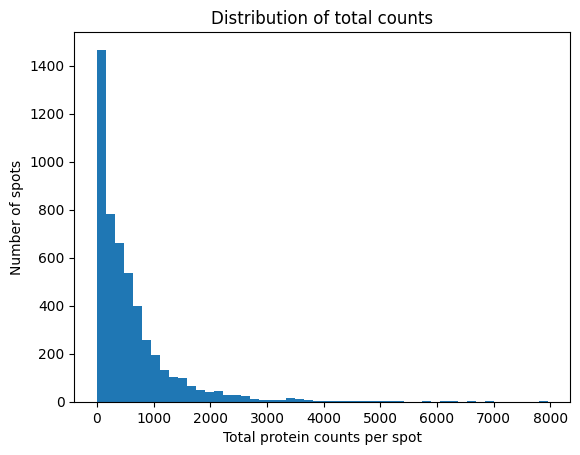

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(adata_pc.obs["total_counts"], bins=50)
plt.xlabel("Total protein counts per spot")
plt.ylabel("Number of spots")
plt.title("Distribution of total counts")
plt.show()


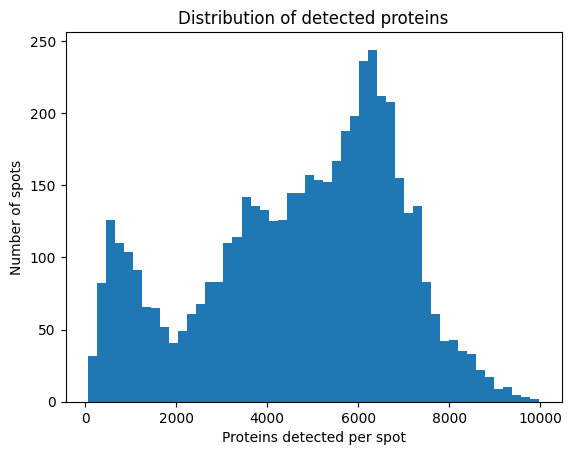

In [25]:
plt.figure()
plt.hist(adata_pc.obs["n_proteins"], bins=50)
plt.xlabel("Proteins detected per spot")
plt.ylabel("Number of spots")
plt.title("Distribution of detected proteins")
plt.show()


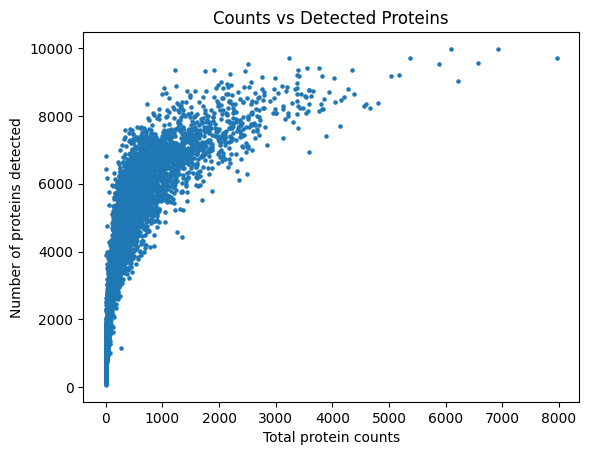

In [26]:
plt.figure()
plt.scatter(adata_pc.obs["total_counts"], adata_pc.obs["n_proteins"], s=5)
plt.xlabel("Total protein counts")
plt.ylabel("Number of proteins detected")
plt.title("Counts vs Detected Proteins")
plt.show()


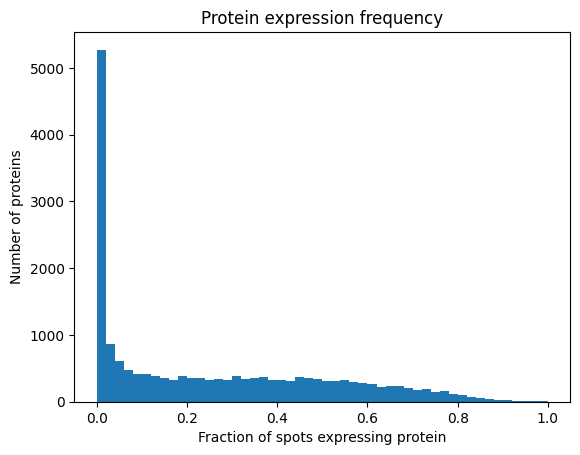

In [27]:
plt.figure()
plt.hist(adata_pc.var["pct_expressed"], bins=50)
plt.xlabel("Fraction of spots expressing protein")
plt.ylabel("Number of proteins")
plt.title("Protein expression frequency")
plt.show()


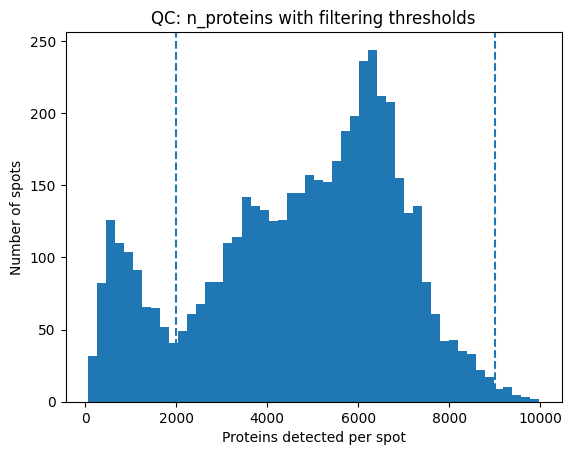

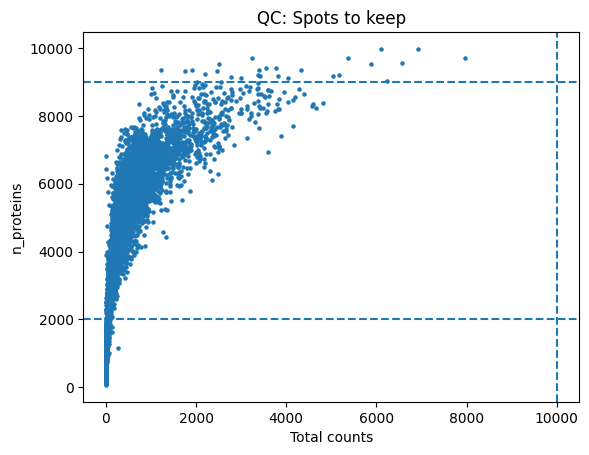

In [28]:
import matplotlib.pyplot as plt

# Visualize cutoffs on your histogram again
plt.figure()
plt.hist(adata_pc.obs["n_proteins"], bins=50)
plt.axvline(2000, linestyle="--")
plt.axvline(9000, linestyle="--")
plt.xlabel("Proteins detected per spot")
plt.ylabel("Number of spots")
plt.title("QC: n_proteins with filtering thresholds")
plt.show()

# Scatter total_counts vs n_proteins
plt.figure()
plt.scatter(adata_pc.obs["total_counts"], adata_pc.obs["n_proteins"], s=5)
plt.axhline(2000, linestyle="--")
plt.axhline(9000, linestyle="--")
plt.axvline(10000, linestyle="--")
plt.xlabel("Total counts")
plt.ylabel("n_proteins")
plt.title("QC: Spots to keep")
plt.show()


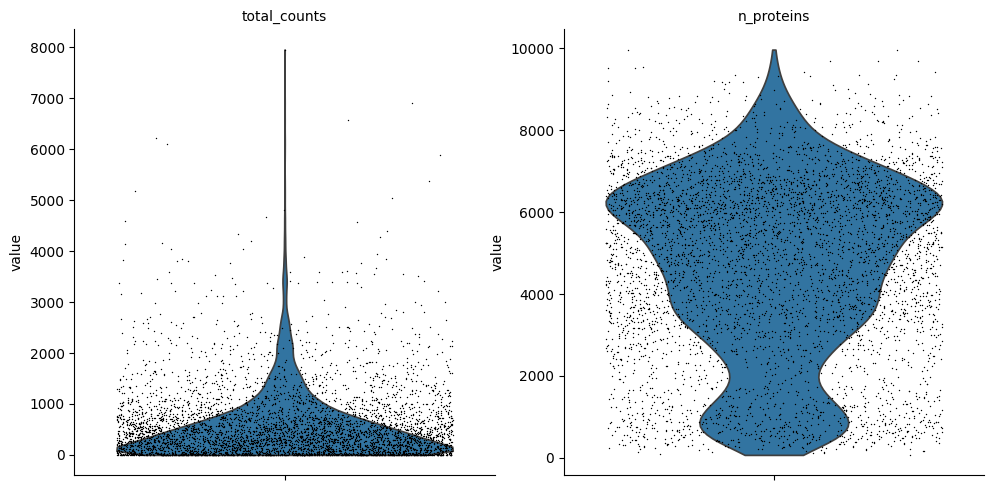

In [24]:
import scanpy as sc

# Suppose adata_protein is your protein AnnData
adata_pc.obs["total_counts"] = adata_pc.X.sum(axis=1)
adata_pc.obs["n_proteins"] = (adata_pc.X > 0).sum(axis=1)

sc.pl.violin(adata_pc
             , keys=["total_counts", "n_proteins"], jitter=0.4, multi_panel=True)


In [ ]:
adata_pc

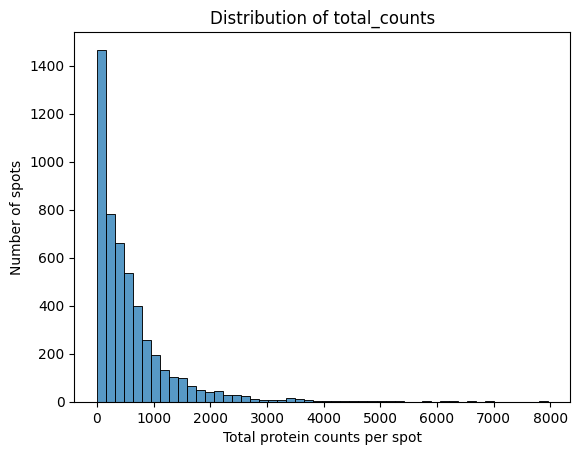

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.histplot(adata_pc.obs["total_counts"], bins=50)
plt.xlabel("Total protein counts per spot")
plt.ylabel("Number of spots")
plt.title("Distribution of total_counts")
plt.show()


In [ ]:
plt.figure()
sns.histplot(adata_pc.obs["total_counts"].clip(upper=10000), bins=40)
plt.xlabel("Total protein counts (<10k)")
plt.ylabel("Number of spots")
plt.title("Total_counts (zoomed)")
plt.show()


In [ ]:
plt.figure()
sns.histplot(adata_pc.obs["n_proteins"], bins=60)
plt.xlabel("Proteins detected per spot")
plt.ylabel("Number of spots")
plt.title("Distribution of n_proteins")
plt.show()


In [ ]:
plt.figure()
sns.histplot(adata_pc.obs["n_proteins"].clip(upper=9000), bins=60)
plt.xlabel("Proteins detected (<9k)")
plt.ylabel("Number of spots")
plt.title("n_proteins (zoomed)")
plt.show()


In [25]:
mask = (
    (adata_pc.obs["n_proteins"] >= 2000) &
    (adata_pc.obs["n_proteins"] <= 9000)
)

print(f"Retaining {mask.sum()} / {adata_pc.n_obs} spots ({mask.mean():.1%})")

adata_pc = adata_pc[mask].copy()


Retaining 4208 / 4992 spots (84.3%)


In [26]:
adata_pc

AnnData object with n_obs × n_vars = 4208 × 18533
    obs: 'total_counts', 'n_proteins'
    var: 'pct_expressed'

In [27]:
sc.pp.filter_cells(adata_pc, min_genes=50)
sc.pp.filter_genes(adata_pc, min_cells=int(0.01 * adata_pc.n_obs))

adata_pc

AnnData object with n_obs × n_vars = 4208 × 14207
    obs: 'total_counts', 'n_proteins', 'n_genes'
    var: 'pct_expressed', 'n_cells'

In [51]:
# Sanity check: intersection of shared barcodes
common_barcodes = adata.obs_names.intersection(adata_pc.obs_names)

# Subset both AnnData objects to shared barcodes
adata_pc = adata_pc[common_barcodes].copy()


In [32]:
# Subset RNA object to match protein object
adata = adata[adata_pc.obs_names].copy()

In [33]:
adata

AnnData object with n_obs × n_vars = 4011 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial'

In [52]:
adata_pc

AnnData object with n_obs × n_vars = 4011 × 18533

## RNA feature selection and dimensionality reduction

In [39]:
adata.raw = adata.copy()

In [40]:
adata.layers["raw_layer"] = adata.raw.X.copy()

In [41]:
# Sanity Check for raw counts
import numpy as np
import scipy.sparse as sp

# Access the raw data; convert to a dense array if it's in sparse format
raw_data = adata.raw.X
if sp.issparse(raw_data):
    raw_data = raw_data.A  # Convert to NumPy array

# Compute basic statistics
print("Min:", raw_data.min())
print("Max:", raw_data.max())
print("Mean:", raw_data.mean())
print("Median:", np.median(raw_data))

Min: 0.0
Max: 11052.0
Mean: 0.8279272
Median: 0.0


In [42]:
adata

AnnData object with n_obs × n_vars = 4011 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial'
    layers: 'raw_layer'

/opt/homebrew/Caskroom/mambaforge/base/envs/spatial_mamba/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_10627/2839973461.py:17: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


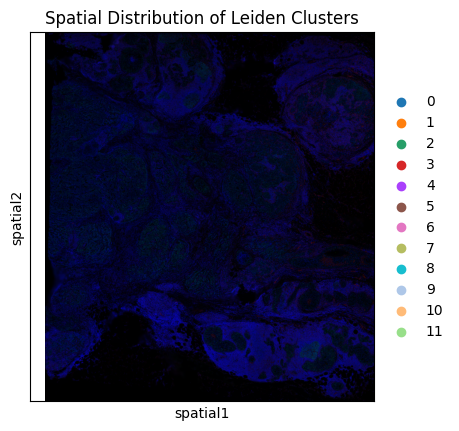

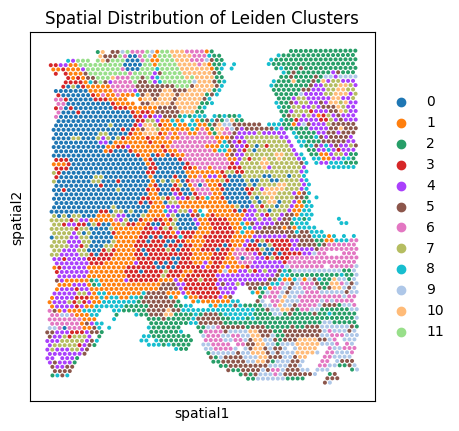

In [47]:
# Preprocess the data (adjust thresholds and parameters as needed)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=500, flavor="seurat") # v3
# sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor="seurat") # v2 was calcuated with 3000

adata = adata[:, adata.var.highly_variable]
# sc.pp.scale(adata, max_value=10)

# Dimensionality reduction
sc.tl.pca(adata, svd_solver='arpack')

# Compute neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Run clustering with the Leiden algorithm
sc.tl.leiden(adata)

# Now plot the spatial distribution colored by the Leiden clusters
sc.pl.spatial(adata, color=["leiden"], spot_size=1.5, title="Spatial Distribution of Leiden Clusters")


sc.pl.spatial(
    adata, 
    color="leiden", 
    spot_size=250,  # try bigger values like 20, 50, or even 100
    alpha_img=0,  # make the tissue image semi-transparent
    title="Spatial Distribution of Leiden Clusters"
)

In [46]:
# !pip3 install leidenalg

  Using cached leidenalg-0.10.2-cp38-abi3-macosx_11_0_arm64.whl.metadata (10 kB)
Using cached leidenalg-0.10.2-cp38-abi3-macosx_11_0_arm64.whl (1.4 MB)


In [44]:
# !pip install igraph

  Using cached igraph-0.11.8-cp39-abi3-macosx_11_0_arm64.whl.metadata (3.8 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
Using cached igraph-0.11.8-cp39-abi3-macosx_11_0_arm64.whl (1.8 MB)
Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)


In [48]:
X = adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X
print("dtype:", X.dtype)
print("min/max:", X.min(), "/", X.max())
print("mean:", X.mean(), " std:", X.std())
print("zero fraction:", np.mean(X == 0))

dtype: float32
min/max: 0.0 / 5.458304
mean: 1.1784558  std: 1.910384
zero fraction: 0.723317875841436


In [49]:
adata

AnnData object with n_obs × n_vars = 4011 × 500
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'spatialdata_attrs', 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'leiden_colors'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    layers: 'raw_layer'
    obsp: 'distances', 'connectivities'

In [36]:
# adata.write_h5ad("VisiumRNABC_v2.h5ad")

In [50]:
adata.write_h5ad("VisiumRNABC_v3.h5ad")

In [53]:
adata_pc.raw = adata_pc.copy()

In [54]:
adata_pc.layers["raw_layer"] = adata_pc.raw.X.copy()

In [37]:
adata_pc

AnnData object with n_obs × n_vars = 4011 × 14207
    obs: 'total_counts', 'n_proteins', 'n_genes'
    var: 'pct_expressed', 'n_cells'
    layers: 'raw_layer'

In [61]:
# Is this normalisation correct????? for proteins?

In [55]:
sc.pp.normalize_total(adata_pc, target_sum=1e4)
sc.pp.log1p(adata_pc)

# Now safe: no zero‑variance proteins
sc.pp.highly_variable_genes(
    adata_pc,
    flavor="seurat",
    n_top_genes=8000,
    subset=True
)

print(f"{adata_pc.n_vars} highly variable proteins retained")

8000 highly variable proteins retained


In [26]:
# # 5️⃣ Normalization (CLR),  HVG selection, scaling

# sc.pp.normalize_total(adata_pc, target_sum=1e4)
# sc.pp.log1p(adata_pc)

# # Now safe: no zero‑variance proteins
# sc.pp.highly_variable_genes(
#     adata_pc,
#     flavor="seurat",
#     n_top_genes=2000,
#     subset=True
# )

# print(f"{adata_pc.n_vars} highly variable proteins retained")


2000 highly variable proteins retained


In [ ]:
# sc.pp.scale(adata_pc, max_value=10)

In [56]:
# 6️⃣ Dimensionality reduction + UMAP
sc.tl.pca(adata_pc)
sc.pp.neighbors(adata_pc, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata_pc)

In [57]:
# Leiden clustering at default resolution (0.5)
sc.tl.leiden(adata_pc, resolution=0.5)

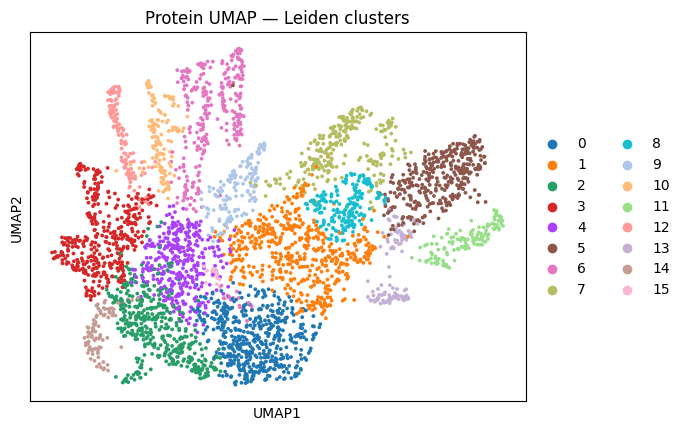

In [58]:
sc.pl.umap(adata_pc, color="leiden", title="Protein UMAP — Leiden clusters")

In [59]:
X = adata_pc.X.toarray() if hasattr(adata_pc.X, "toarray") else adata_pc.X
print("dtype:", X.dtype)
print("min/max:", X.min(), "/", X.max())
print("mean:", X.mean(), " std:", X.std())
print("zero fraction:", np.mean(X == 0))

dtype: float64
min/max: 0.0 / 8.454389769670453
mean: 0.20429797145140438  std: 0.44702165158592755
zero fraction: 0.7655999439042632


In [60]:
adata_pc

AnnData object with n_obs × n_vars = 4011 × 500
    obs: 'total_counts', 'n_proteins', 'n_genes', 'leiden'
    var: 'pct_expressed', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_layer'
    obsp: 'distances', 'connectivities'

In [33]:
# adata_pc.write_h5ad("VisiumProteinBC_v2.h5ad")

In [64]:
adata_pc.write_h5ad("VisiumProteinBC_v3.h5ad")

KeyError: 'HER2'

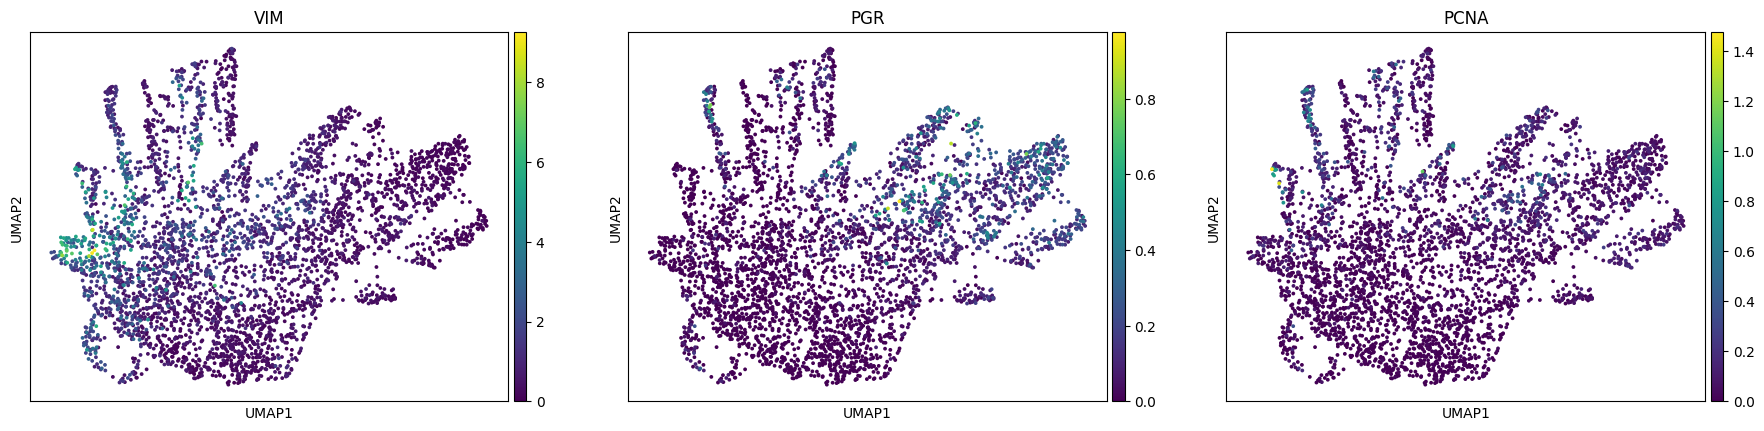

In [61]:
sc.pl.umap(adata_pc, color=["VIM", 'PGR', 'PCNA', 'HER2'])

In [ ]:
sc.tl.rank_genes_groups(
    adata_pc,
    groupby="leiden",        # use cluster labels
    method="t-test",         # or "wilcoxon"
    use_raw=False
)


In [ ]:
sc.pl.rank_genes_groups(adata_pc, n_genes=5, sharey=False)

In [ ]:
import pandas as pd

# Grab top 3 proteins per cluster
result = adata_pc.uns['rank_genes_groups']
groups = result['names'].dtype.names
top_proteins = pd.DataFrame({group: result['names'][group][:3] for group in groups})

# Flatten the list and remove duplicates
top_proteins_flat = list(set(top_proteins.values.ravel()))


In [ ]:
sc.pl.heatmap(
    adata_pc,
    var_names=top_proteins_flat,
    groupby="leiden",
    swap_axes=True,
    cmap="viridis",
    dendrogram=True
)


In [ ]:
sc.pl.dotplot(
    adata_pc,
    var_names=top_proteins_flat,  # your top markers
    groupby="leiden",
    standard_scale="var",         # normalize across proteins
    dendrogram=True,              # ⬅️ adds hierarchical clustering to clusters
    dot_max=0.5,
    color_map="Blues"
)


In [ ]:
adata_pc

In [63]:
# Check equality
print((adata_pc.obs_names == adata.obs_names).all())  # True?

# Or how many are shared
print(f"Shared barcodes: {len(adata_pc.obs_names.intersection(adata.obs_names))}")


True
Shared barcodes: 4011


In [ ]:
# Get top 10 HVGs from adata.var
top10_genes = adata.var.sort_values("highly_variable", ascending=False).head(10).index.tolist()

# Violin plot
sc.pl.violin(adata, top10_genes, groupby="leiden", jitter=0.4, rotation=90)

In [ ]:
# Get top 10 HV proteins
top10_proteins = adata_pc.var.sort_values("highly_variable", ascending=False).head(10).index.tolist()

# Violin plot
sc.pl.violin(adata_pc, top10_proteins, groupby="leiden", jitter=0.4, rotation=90)


In [ ]:
sc.pl.dotplot(adata, top10_genes, groupby="leiden", standard_scale="var", dot_max=0.4)
sc.pl.dotplot(adata_pc, top10_proteins, groupby="leiden", standard_scale="var", dot_max=0.4)

In [43]:
sc.pl.spatial(
    adata_pc, 
    color=["leiden", "PGR"], 
    spot_size=250,  # try bigger values like 20, 50, or even 100
    alpha_img=0,  # make the tissue image semi-transparent
    title="Spatial Distribution of Leiden Clusters"
)

KeyError: "Could not find 'spatial' or 'X_spatial' in .obsm"

# Assemble multi-omic Visium BC object

In [1]:
import scanpy as sc
import muon as mu
import matplotlib.pyplot as plt
import numpy as np

/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# Replace with path to your Visium dataset folder
path = "./"

# This expects 'filtered_feature_bc_matrix.h5' and 'spatial' directory inside the path
adata_early = sc.read_visium(path, load_images=True)

/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_8713/1259474044.py:5: FutureWarning: Use `squidpy.read.visium` instead.
  adata_early = sc.read_visium(path, load_images=True)
/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
adata_early

AnnData object with n_obs × n_vars = 4169 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'isotype_control', 'normalized', 'pattern', 'read', 'secondary_name', 'sequence'
    uns: 'spatial'
    obsm: 'spatial'

/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_11379/1017024548.py:2: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_early, img_key="hires", color=["ESR1", "PGR", "ERBB2"])


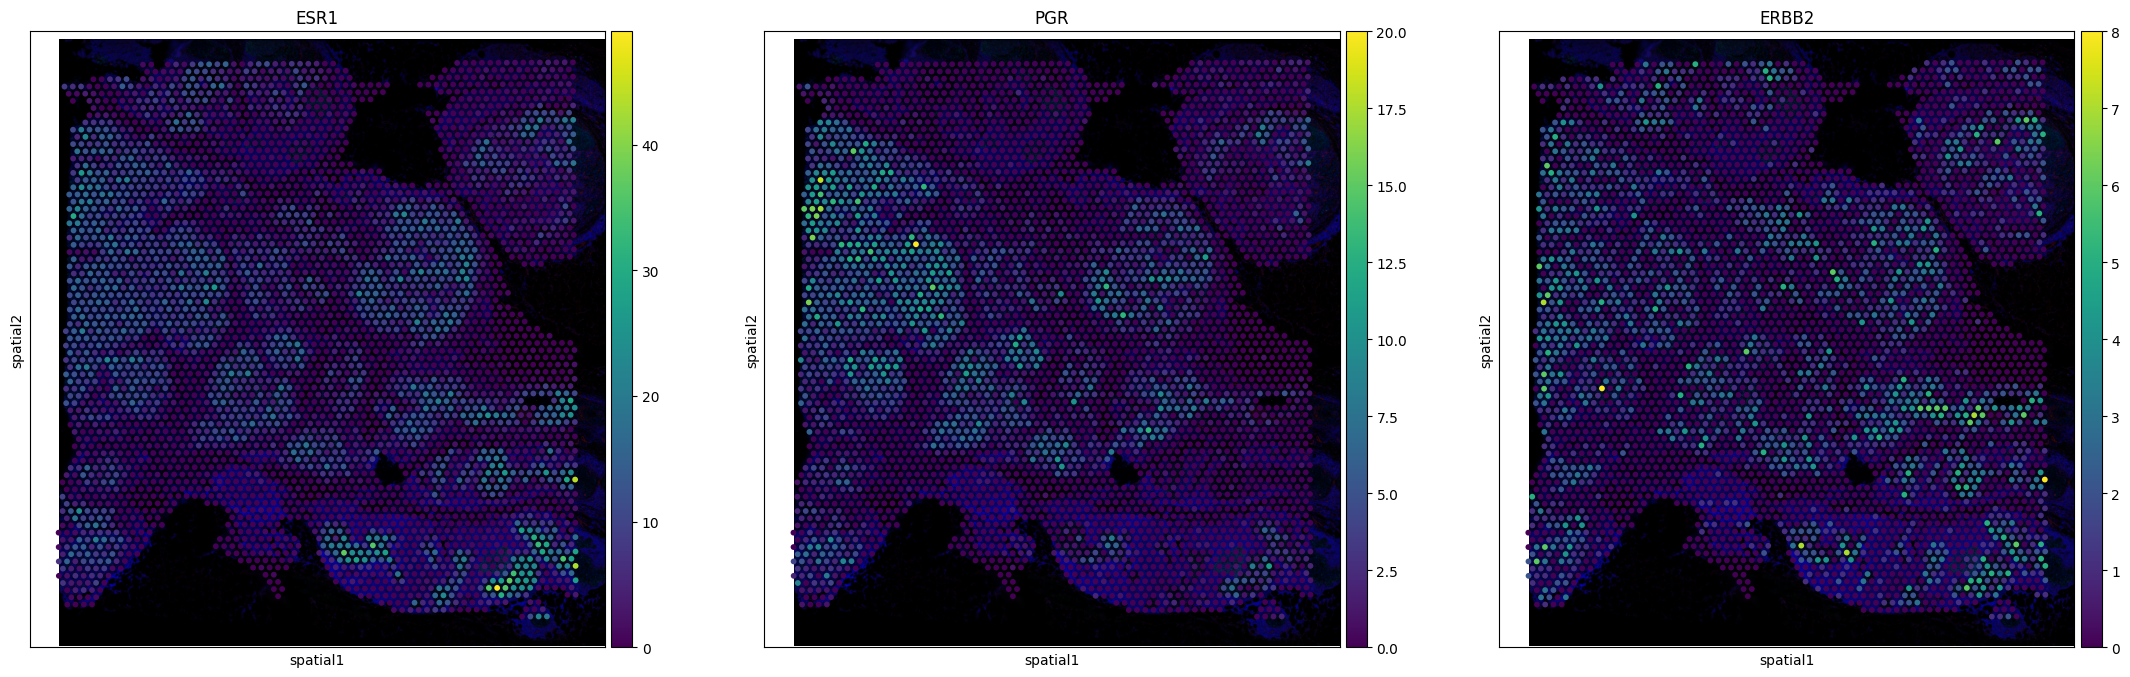

In [4]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata_early, img_key="hires", color=["ESR1", "PGR", "ERBB2"])

In [22]:
# Check feature types
print(adata.var['feature_types'].value_counts())

feature_types
Gene Expression    18085
Name: count, dtype: int64


In [5]:
import scanpy as sc

# Load multi-modal data
filename = "CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_filtered_feature_bc_matrix.h5"
adata = sc.read_10x_h5(filename, gex_only=False)

# Subset Gene Expression data
gex_idx = adata.var['feature_types'] == 'Gene Expression'
data_gex = adata[:, gex_idx].copy()

# Subset Antibody Capture data (proteins)
protein_idx = adata.var['feature_types'] == 'Antibody Capture'
data_protein = adata[:, protein_idx].copy()

/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
data_gex

AnnData object with n_obs × n_vars = 4169 × 18085
    var: 'gene_ids', 'feature_types', 'genome', 'isotype_control', 'normalized', 'pattern', 'read', 'secondary_name', 'sequence'

In [7]:
data_protein

AnnData object with n_obs × n_vars = 4169 × 35
    var: 'gene_ids', 'feature_types', 'genome', 'isotype_control', 'normalized', 'pattern', 'read', 'secondary_name', 'sequence'

In [55]:
# Transfer spatial info from adata_early to data_gex and data_protein
for ad in [data_gex, data_protein]:
    ad.uns['spatial'] = adata_early.uns.copy()
    ad.obsm['spatial'] = adata_early.obsm['spatial'].copy() if 'spatial' in adata_early.obsm else adata_early.obsm['spatial']

# # Alternatively, directly assign numpy array (if present)
# if 'spatial' in adata_early.obsm:
#     spatial_coords = adata_early.obsm['spatial']
#     for ad in [data_gex, data_protein]:
#         ad.obsm['spatial'] = spatial_coords.copy()

In [56]:
data_gex

AnnData object with n_obs × n_vars = 4169 × 18085
    var: 'gene_ids', 'feature_types', 'genome', 'isotype_control', 'normalized', 'pattern', 'read', 'secondary_name', 'sequence'
    uns: 'spatial'
    obsm: 'spatial'

In [52]:
data_protein

AnnData object with n_obs × n_vars = 4169 × 35
    var: 'gene_ids', 'feature_types', 'genome', 'isotype_control', 'normalized', 'pattern', 'read', 'secondary_name', 'sequence'
    uns: 'spatial'
    obsm: 'spatial'

In [39]:
sc.pp.normalize_total(data_gex, inplace=True)
sc.pp.log1p(data_gex)
sc.pp.highly_variable_genes(data_gex, flavor="seurat", n_top_genes=2000)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [40]:
sc.pp.pca(data_gex)
sc.pp.neighbors(data_gex)
sc.tl.umap(data_gex)
sc.tl.leiden(
    data_gex, key_added="clusters", flavor="igraph", directed=False, n_iterations=2
)

/opt/homebrew/Caskroom/mambaforge/base/envs/spatial_mamba/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
data_gex.obs

clusters
AACACTTGGCAAGGAA-1        0
AACAGGATTCATAGTT-1        7
AACAGGCCAACGATTA-1        9
AACAGGTTATTGCACC-1        6
AACAGGTTCACCGAAG-1        7
...                     ...
TGTTGGAACGAGGTCA-1        0
TGTTGGAAGCTCGGTA-1       16
TGTTGGATGGACTTCT-1       15
TGTTGGCCAGACCTAC-1       18
TGTTGGCCTACACGTG-1       15

[4169 rows x 1 columns]

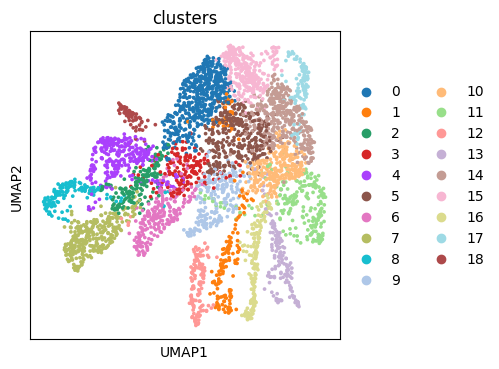

In [44]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(data_gex, color=["clusters"], wspace=0.4)

In [8]:
import scanpy as sc

In [9]:
import muon as mu

In [10]:
import matplotlib.pyplot as plt

In [11]:
# Create MuData object holding both modalities
mdata = mu.MuData({"rna": data_gex, "protein": data_protein})

/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/mudata/_core/mudata.py:430: UserWarning: Duplicated var_names should not be present in different modalities due to the ambiguity that leads to.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/mudata/_core/mudata.py:430: UserWarning: Duplicated var_names should not be present in different modalities due to the ambiguity that leads to.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.1

In [12]:
# Transfer spatial info to uns
data_spatial_uns = adata_early.uns['spatial']
for mod in ["rna", "protein"]:
    mdata.mod[mod].uns['spatial'] = data_spatial_uns.copy()
    mdata.mod[mod].obsm['spatial'] = adata_early.obsm['spatial']  # this should be a numpy array, safe to assign directly

/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_11379/2082391304.py:4: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(mdata.mod["rna"], img_key="hires", color=["VIM"])


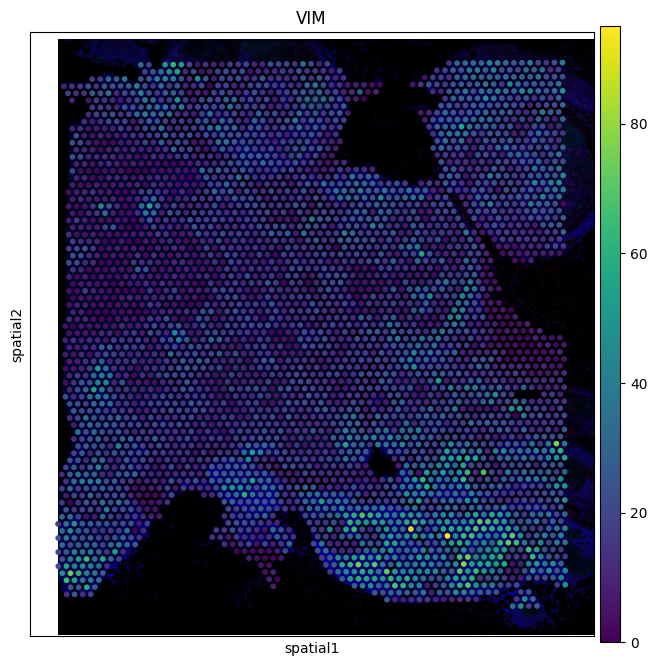

In [13]:
# Now you can plot from either modality
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
sc.pl.spatial(mdata.mod["rna"], img_key="hires", color=["VIM"])

/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_11379/971943191.py:3: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(mdata.mod["protein"], img_key="hires", color=["VIM", "PCNA", "HLA-DRA"])


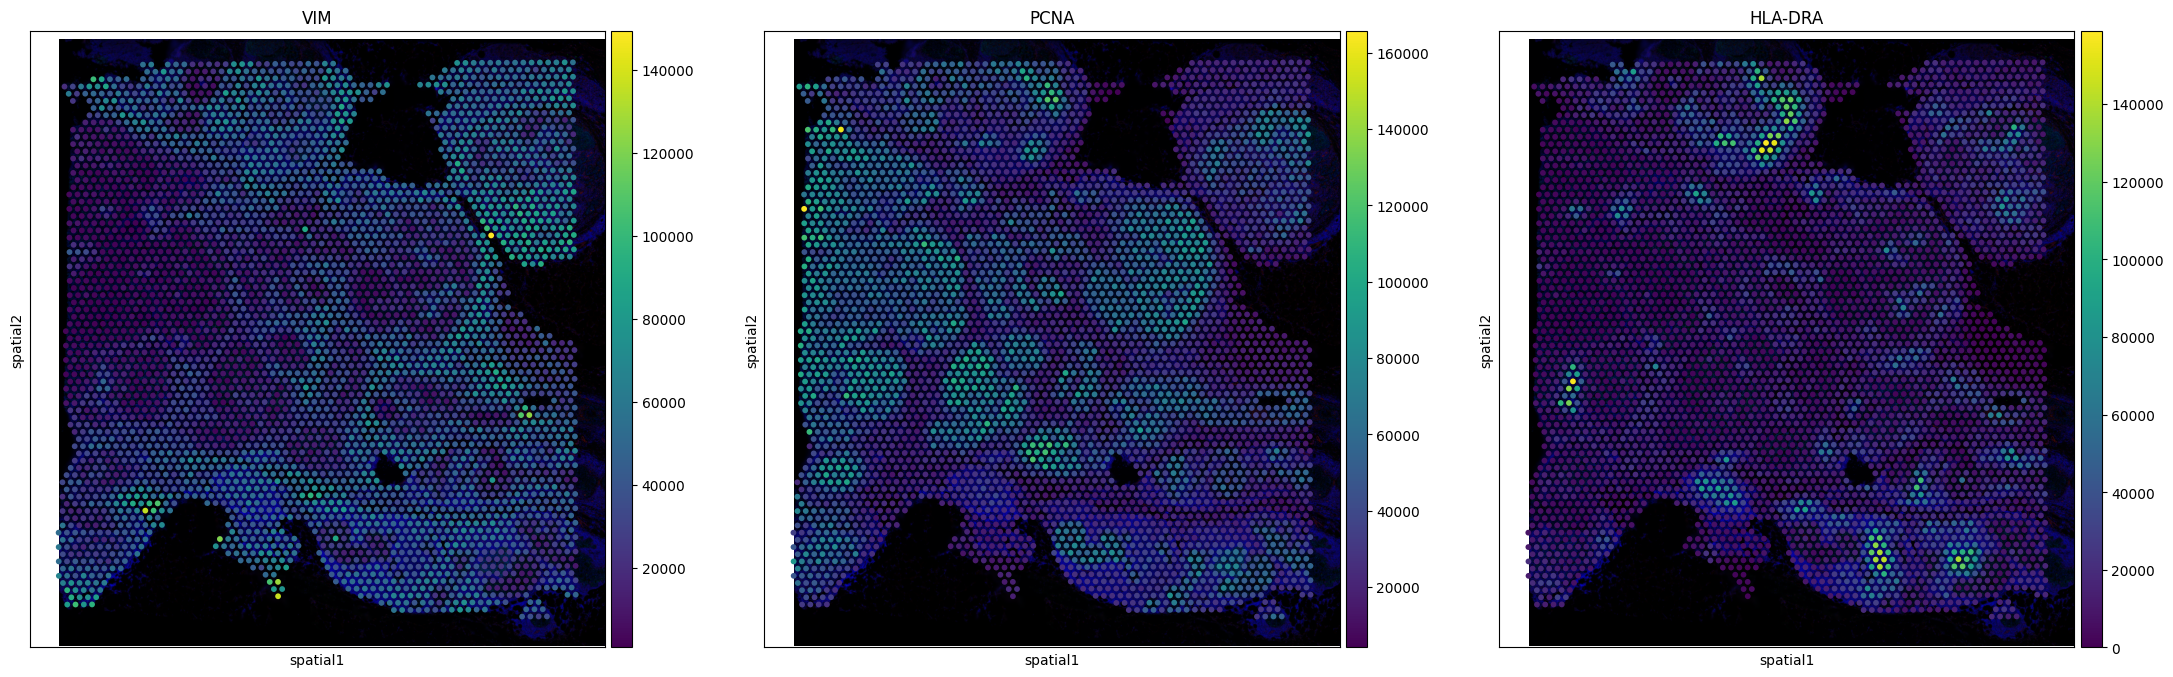

In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
sc.pl.spatial(mdata.mod["protein"], img_key="hires", color=["VIM", "PCNA", "HLA-DRA"])

In [17]:
# Extract and save RNA
mdata.mod['rna'].write("rna_data.h5ad")

In [18]:
# Extract and save protein
mdata.mod['protein'].write("protein_data.h5ad")

In [19]:
adata_protein = sc.read("protein_data.h5ad")
adata_protein

/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4169 × 35
    var: 'gene_ids', 'feature_types', 'genome', 'isotype_control', 'normalized', 'pattern', 'read', 'secondary_name', 'sequence'
    uns: 'spatial'
    obsm: 'spatial'

In [20]:
adata = sc.read("rna_data.h5ad")
adata

/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4169 × 18085
    var: 'gene_ids', 'feature_types', 'genome', 'isotype_control', 'normalized', 'pattern', 'read', 'secondary_name', 'sequence'
    uns: 'spatial'
    obsm: 'spatial'

In [21]:
adata.raw = adata.copy()

/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [22]:
adata.layers["raw_layer"] = adata.raw.X.copy()

In [24]:
# !pip3 install igraph

  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.0 MB/s eta 0:00:00a 0:00:01
Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [igraph]


In [26]:
# !pip3 install leidenalg

  Using cached leidenalg-0.10.2-cp38-abi3-macosx_11_0_arm64.whl.metadata (10 kB)
Using cached leidenalg-0.10.2-cp38-abi3-macosx_11_0_arm64.whl (1.4 MB)


/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/scanpy/preprocessing/_pca/__init__.py:383: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_11379/2839973461.py:17: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)
/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_11379/2839973461.py:20: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color=["leiden"], spot_size=1.5, title="Spatial Distribution of Leiden Clusters")


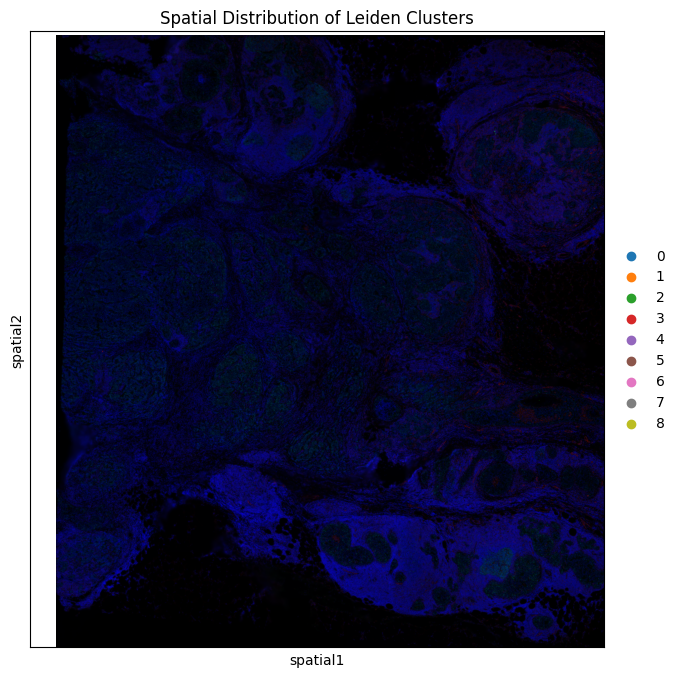

/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_11379/2839973461.py:23: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


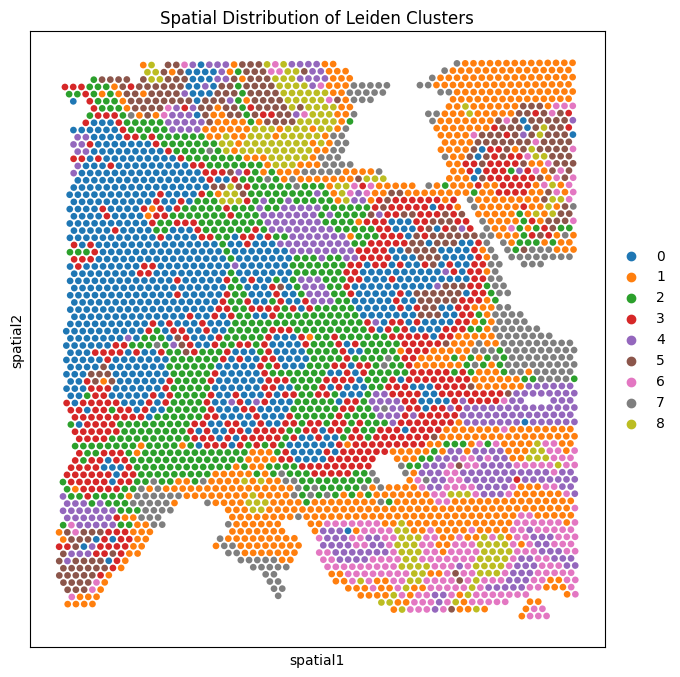

In [27]:
# Preprocess the data (adjust thresholds and parameters as needed)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=500, flavor="seurat") # v3
# sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor="seurat") # v2 was calcuated with 3000

adata = adata[:, adata.var.highly_variable]
# sc.pp.scale(adata, max_value=10)

# Dimensionality reduction
sc.tl.pca(adata, svd_solver='arpack')

# Compute neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Run clustering with the Leiden algorithm
sc.tl.leiden(adata)

# Now plot the spatial distribution colored by the Leiden clusters
sc.pl.spatial(adata, color=["leiden"], spot_size=1.5, title="Spatial Distribution of Leiden Clusters")


sc.pl.spatial(
    adata, 
    color="leiden", 
    spot_size=250,  # try bigger values like 20, 50, or even 100
    alpha_img=0,  # make the tissue image semi-transparent
    title="Spatial Distribution of Leiden Clusters"
)

In [28]:
adata.write_h5ad("visiumBC_500_v2.h5ad")

In [5]:
adata_protein.raw = adata_protein.copy()

/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
adata_protein.layers['raw_proteins'] = adata_protein.raw.X.copy()

In [35]:
# Convert sparse matrix to dense (if needed)
X_dense = adata_protein.X.toarray() if not isinstance(adata_protein.X, np.ndarray) else adata_protein.X

# CLR normalization per spot
X_clr = np.log1p(X_dense / np.median(X_dense, axis=1, keepdims=True))

# Update the AnnData matrix
adata_protein.X = X_clr

/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_11379/3913124542.py:5: RuntimeWarning: divide by zero encountered in divide
  X_clr = np.log1p(X_dense / np.median(X_dense, axis=1, keepdims=True))
/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_11379/3913124542.py:5: RuntimeWarning: invalid value encountered in divide
  X_clr = np.log1p(X_dense / np.median(X_dense, axis=1, keepdims=True))


In [2]:
adata_protein = sc.read("protein_data.h5ad")

/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
adata_protein

AnnData object with n_obs × n_vars = 4169 × 35
    var: 'gene_ids', 'feature_types', 'genome', 'isotype_control', 'normalized', 'pattern', 'read', 'secondary_name', 'sequence'
    uns: 'spatial'
    obsm: 'spatial'

In [38]:
adata_protein.X

array([[1.3755726 , 0.77371776, 0.77371776, ..., 1.3846732 , 1.3365833 ,
        0.6715545 ],
       [1.4021252 , 1.0771068 , 2.0696452 , ..., 1.3203388 , 1.6442881 ,
        0.7106928 ],
       [1.1669455 , 0.8538892 , 1.1431388 , ..., 1.4576782 , 1.4119718 ,
        0.44373545],
       ...,
       [1.5096092 , 0.90479076, 0.9314618 , ..., 1.4972898 , 1.5179906 ,
        0.35456085],
       [1.3101336 , 0.9477819 , 1.1249233 , ..., 1.2747414 , 1.3489388 ,
        0.58530354],
       [1.4702028 , 1.6384282 , 1.5948116 , ..., 1.4813384 , 1.5492553 ,
        0.32942167]], shape=(4169, 35), dtype=float32)

In [39]:
import numpy as np

# Ensure dense matrix
X = adata_protein.X.toarray() if not isinstance(adata_protein.X, np.ndarray) else adata_protein.X

print("Summary statistics for normalized protein data (adata_protein.X):")
print(f"Shape: {X.shape}")
print(f"Min: {X.min():.3f}")
print(f"Max: {X.max():.3f}")
print(f"Mean: {X.mean():.3f}")
print(f"Median: {np.median(X):.3f}")
print(f"Std: {X.std():.3f}")


Summary statistics for normalized protein data (adata_protein.X):
Shape: (4169, 35)
Min: nan
Max: nan
Mean: nan
Median: nan
Std: nan


In [40]:
X_raw = adata_protein.layers["raw_proteins"].toarray()
print("Raw protein matrix shape:", X_raw.shape)
print("Any NaNs?", np.isnan(X_raw).any())
print("Any all-zero rows?", np.any(X_raw.sum(axis=1) == 0))


Raw protein matrix shape: (4169, 35)
Any NaNs? False
Any all-zero rows? False


In [41]:
X_raw = adata_protein.layers["raw_proteins"].toarray()

# Compute per-spot medians (add epsilon to avoid division by zero)
spot_medians = np.median(X_raw, axis=1, keepdims=True)
spot_medians[spot_medians == 0] = 1  # prevent division by zero

# CLR normalization
X_clr = np.log1p(X_raw / spot_medians)

# Assign back to adata.X
adata_protein.X = X_clr


In [42]:
print(f"Min: {np.min(X_clr):.3f}")
print(f"Max: {np.max(X_clr):.3f}")
print(f"Mean: {np.mean(X_clr):.3f}")


Min: 0.000
Max: 11.002
Mean: 0.823


In [7]:
#before normalisation

import numpy as np

# Get the raw protein matrix from the .layers slot
X_raw = adata_protein.layers["raw_proteins"].toarray() if not isinstance(adata_protein.layers["raw_proteins"], np.ndarray) else adata_protein.layers["raw_proteins"]

# Basic statistics
print("Raw protein matrix summary:")
print(f"Shape: {X_raw.shape}")
print(f"Min: {np.min(X_raw):.3f}")
print(f"Max: {np.max(X_raw):.3f}")
print(f"Mean: {np.mean(X_raw):.3f}")
print(f"Median: {np.median(X_raw):.3f}")
print(f"Standard Deviation: {np.std(X_raw):.3f}")
print(f"# of All-Zero Spots: {(X_raw.sum(axis=1) == 0).sum()} out of {X_raw.shape[0]}")


Raw protein matrix summary:
Shape: (4169, 35)
Min: 0.000
Max: 902962.000
Mean: 23103.607
Median: 12564.000
Standard Deviation: 30671.938
# of All-Zero Spots: 0 out of 4169


## 🧮 Centered Log-Ratio (CLR) Normalization for Protein Expression

In spatial proteomics (e.g., 10x Visium CytAssist), protein measurements from antibody capture vary widely across spots due to technical and biological reasons. To make protein expression values comparable across spots, we apply **CLR normalization** per spot.

### 🔍 What Does CLR Do?

For each spot, CLR scales each protein’s expression relative to the **median protein expression in that same spot**, then applies a log transformation:

$$
y_{ij} = \log_1p\left( \frac{x_{ij}}{\tilde{x}_i} \right)
$$

Where:  
- $x_{ij}$ is the raw expression of protein $j$ in spot $i$  
- $\tilde{x}_i$ is the **median expression across all proteins** in spot $i$  
- $\log_1p(x) = \log(1 + x)$

### 📌 Why Normalize This Way?

| Purpose                    | Reason                                                                 |
|----------------------------|------------------------------------------------------------------------|
| Per-spot normalization     | Adjusts for technical variation in total protein counts                |
| Median as denominator      | Robust to outliers and zero-inflated distributions                     |
| Log1p transformation       | Reduces skew and stabilizes variance                                   |
| Preserves relative signal  | Highlights which proteins are up/down relative to the local background |

### ✅ Example Implementation in Python

```python
X_raw = adata_protein.layers["raw_proteins"].toarray()
spot_medians = np.median(X_raw, axis=1, keepdims=True)
spot_medians[spot_medians == 0] = 1  # avoid divide-by-zero
X_clr = np.log1p(X_raw / spot_medians)
adata_protein.X = X_clr


In [8]:
X_raw = adata_protein.layers["raw_proteins"].toarray()

# Compute per-spot medians (add epsilon to avoid division by zero)
spot_medians = np.median(X_raw, axis=1, keepdims=True)
spot_medians[spot_medians == 0] = 1  # prevent division by zero

# CLR normalization
X_clr = np.log1p(X_raw / spot_medians)

# Assign back to adata.X
adata_protein.X = X_clr

In [9]:
# Basic statistics after CLR normalization
print("CLR-normalized protein matrix summary:")
print(f"Shape: {X_clr.shape}")
print(f"Min: {np.min(X_clr):.3f}")
print(f"Max: {np.max(X_clr):.3f}")
print(f"Mean: {np.mean(X_clr):.3f}")
print(f"Median: {np.median(X_clr):.3f}")
print(f"Standard Deviation: {np.std(X_clr):.3f}")
print(f"# of All-Zero Spots: {(X_clr.sum(axis=1) == 0).sum()} out of {X_clr.shape[0]}")


CLR-normalized protein matrix summary:
Shape: (4169, 35)
Min: 0.000
Max: 11.002
Mean: 0.823
Median: 0.693
Standard Deviation: 0.642
# of All-Zero Spots: 0 out of 4169


In [10]:
adata_protein.write_h5ad("protein_BC.h5ad")

In [5]:
adata_protein = sc.read("protein_BC.h5ad")

/opt/homebrew/Caskroom/mambaforge/base/envs/muon/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
adata_rna = sc.read("RNA_BC_500_v2.h5ad")

In [7]:
# Copy spatial coordinates to RNA
adata_rna.obs['array_row'] = adata_early.obs['array_row']
adata_rna.obs['array_col'] = adata_early.obs['array_col']

# Copy spatial coordinates to Protein
adata_protein.obs['array_row'] = adata_early.obs['array_row']
adata_protein.obs['array_col'] = adata_early.obs['array_col']


In [8]:
adata_rna

AnnData object with n_obs × n_vars = 4169 × 500
    obs: 'leiden', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'isotype_control', 'normalized', 'pattern', 'read', 'secondary_name', 'sequence', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial'
    obsm: 'X_pca', 'spatial'
    varm: 'PCs'
    layers: 'raw_layer'
    obsp: 'connectivities', 'distances'

In [9]:
adata_rna.write_h5ad("RNA_BC_500_v2.h5ad")

In [11]:
adata_protein

AnnData object with n_obs × n_vars = 4169 × 35
    obs: 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'isotype_control', 'normalized', 'pattern', 'read', 'secondary_name', 'sequence'
    uns: 'spatial'
    obsm: 'spatial'
    layers: 'raw_proteins'

In [10]:
adata_protein.write_h5ad("protein_BC.h5ad")